In [ ]:
!pip install roboflow torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 309.9/363.4 MB 112.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="XY63WQR2lm8DifpPNP4l")  # Your API Key
project = rf.workspace("dronedetection-ywqkv").project("angle-0fxd4")
version = project.version(1)

# Download dataset and save it to Google Drive
dataset = version.download("yolov8", location="/content/drive/MyDrive/Drone Angle")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import os
dataset_path = "/content/drive/MyDrive/Drone Angle"
print("Dataset Files:", os.listdir(dataset_path))


In [ ]:
!pip install ultralytics
# from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 4.0 MB/s eta 0:00:00


In [ ]:
data_yaml_path = "/content/drive/MyDrive/Drone Angle/data.yaml"

# Read and display the modified YAML file
with open(data_yaml_path, "r") as file:
    print(file.read())


names:
- '0_360'
- '135'
- '180'
- '225'
- '270'
- '315'
- '45'
- '90'
nc: 8
roboflow:
  license: CC BY 4.0
  project: angle-0fxd4
  url: https://universe.roboflow.com/dronedetection-ywqkv/angle-0fxd4/dataset/1
  version: 1
  workspace: dronedetection-ywqkv
test: ../test/images
train: ../train/images
val: ../train/images 


In [ ]:
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model
model = YOLO("yolov8s.pt")

# Train the model
model.train(data=f"/content/drive/MyDrive/Drone Angle/data.yaml", epochs=60, imgsz=640, batch=8, workers=2)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model.save("/content/drive/MyDrive/Angle_Model_YOLOv8.pt")


Saving Screenshot 2025-03-20 152546.png to Screenshot 2025-03-20 152546.png

image 1/1 /content/Screenshot 2025-03-20 152546.png: 640x448 1 315, 46.2ms
Speed: 2.5ms preprocess, 46.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


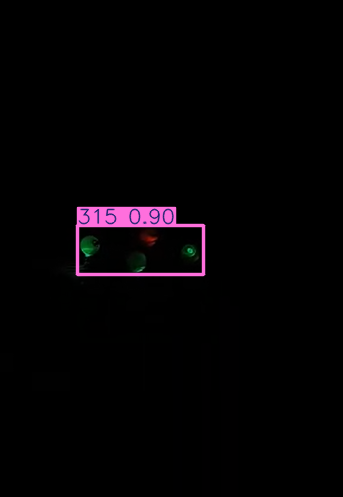

In [ ]:
from google.colab import files

# Upload a test image
uploaded = files.upload()

# Run inference
results = model(list(uploaded.keys())[0])
results[0].show()  # Display detections


In [ ]:
from google.colab import files

uploaded = files.upload()  # Upload a video file (MP4, AVI, etc.)
video_path = list(uploaded.keys())[0]  # Get the uploaded file name
print(f"Uploaded video: {video_path}")



Saving test vide.mp4 to test vide.mp4
Uploaded video: test vide.mp4


In [ ]:
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO("/content/drive/MyDrive/Angle_Model_YOLOv8.pt")

# Run inference on the video and save the output
output_video_path = "output.mp4"
results = model.predict(source=video_path, save=True, save_txt=True)

print(f"Processed video saved as {output_video_path}")




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/504) /content/test vide.mp4: 640x384 1 270, 38.2ms
video 1/1 (frame 2/504) /content/test vide.mp4: 640x384 1 270, 10.7ms
video 1/1 (frame 3/504) /content/test vide.mp4: 640x384 1 270, 10.6ms
video 1/1 (frame 4/504) /content/test vide.mp4: 640x384 1 270, 10.6ms
video 1/1 (frame 5/504) /content/test vide.mp4: 640x384 1 270, 10.6ms
video 1/1 (frame 6/504) /content/test vide.mp4: 640x384 1 270, 10.6ms
video 1/1 (frame 7/504) /content/tes

In [ ]:
import os

# Check YOLOv8 output directory
output_folder = "runs/detect/predict/"
print("Processed video files:", os.listdir(output_folder))


Processed video files: ['labels', 'VID_20250320_063300.avi']


In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/drive/MyDrive/Angle_Model_YOLOv8.pt")

# Export as TorchScript Lite
model.export(format="torchscript", optimize=True)


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/Angle_Model_YOLOv8.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (21.5 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: optimizing for mobile...
TorchScript: export success ✅ 4.1s, saved as '/content/drive/MyDrive/Angle_Model_YOLOv8.torchscript' (42.6 MB)

Export complete (6.8s)
Results saved to /content/drive/MyDrive
Predict:         yolo predict task=detect model=/content/drive/MyDrive/Angle_Model_YOLOv8.torchscript imgsz=640  
Validate:        yolo val task=detect model=/content/drive/MyDrive/Angle_Model_YOLOv8.torchscript imgsz=640 data=/content/drive/MyDrive/Drone Angle/data.yaml  
Visualize:       https://netron.app


'/content/drive/MyDrive/Angle_Model_YOLOv8.torchscript'